Dataset Loaded Successfully
Columns: Index(['TANGGAL', 'BL', 'WAKTU'], dtype='object')
Shape of X: (976, 24, 1)
Shape of y: (976,)


/tmp/ipython-input-2757785355.py:24: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data = data.fillna(method='ffill').fillna(method='bfill')
/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 24, 128)        │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 24, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 118,081 (461.25 KB)

 Trainable params: 118,081 (461.25 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 6s 104ms/step - loss: 0.1727 - val_loss: 0.0407
Epoch 2/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 69ms/step - loss: 0.0282 - val_loss: 0.0089
Epoch 3/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - loss: 0.0086 - val_loss: 0.0042
Epoch 4/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - loss: 0.0063 - val_loss: 0.0018
Epoch 5/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - loss: 0.0048 - val_loss: 0.0019
Epoch 6/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - loss: 0.0055 - val_loss: 0.0030
Epoch 7/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - loss: 0.0050 - val_loss: 0.0018
Epoch 8/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - loss: 0.0043 - val_loss: 0.0019
Epoch 9/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - loss: 0.0050 - val_loss: 0.0030
Epoch 10/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - loss: 0.0043 - val_loss: 0.0041
Epoch 11/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 75ms/step - loss: 0.0052 - val_loss: 0.0022
Epoch 12/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 86ms/step - loss: 0.

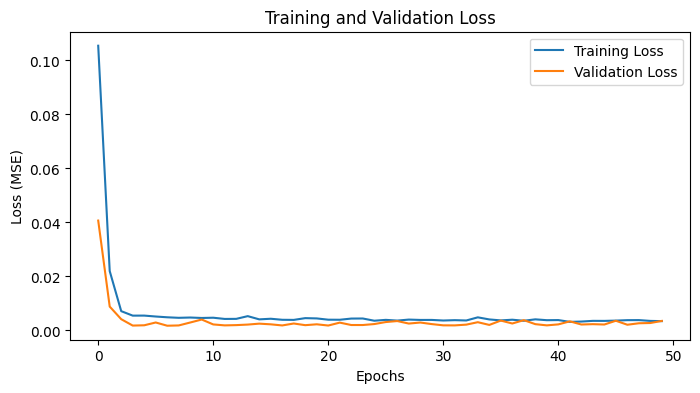

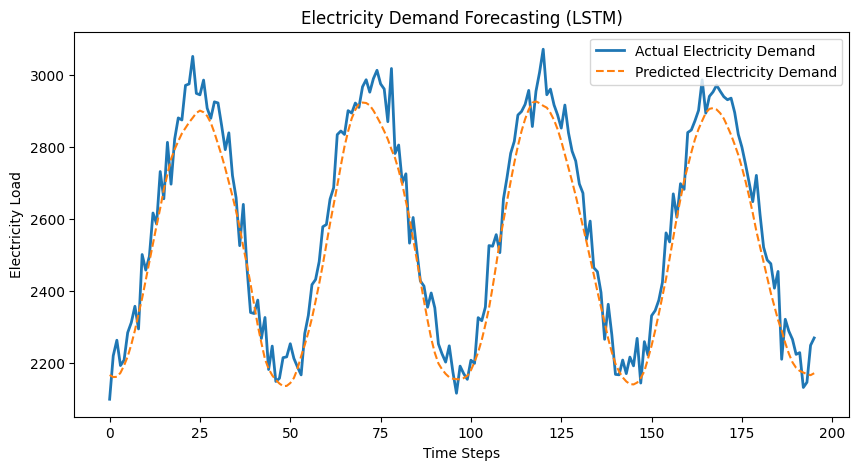

✅ Model Saved Successfully!


In [2]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout


data = pd.read_excel("/content/synthetic_PLN_dataset.xlsx")
print("Dataset Loaded Successfully")
print("Columns:", data.columns)

# Target variable (Electricity demand)
target_col = 'BL'   # Modify if your target column name differs

# Convert Date/Time to datetime index if present
if 'Date' in data.columns or 'Time' in data.columns:
    dt_col = 'Date' if 'Date' in data.columns else 'Time'
    data[dt_col] = pd.to_datetime(data[dt_col])
    data = data.sort_values(dt_col).set_index(dt_col)

# Handle missing values
data = data.fillna(method='ffill').fillna(method='bfill')

# -------------------------------
# 2. Feature Selection
# -------------------------------
# If you have renewable & weather features (like Solar, Wind, Temp), include them:
features = ['BL']  # replace with ['BL', 'Solar', 'Wind', 'Temperature'] if available
dataset = data[features].values


scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(dataset)


def create_sequences(data, seq_len=24):
    X, y = [], []
    for i in range(len(data) - seq_len):
        X.append(data[i:i+seq_len])
        y.append(data[i+seq_len, 0])  # Predict only target (first column)
    return np.array(X), np.array(y)

SEQ_LEN = 24  # past 24 hours → next hour
X, y = create_sequences(scaled, SEQ_LEN)
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

# Split into Train/Test
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# -------------------------------
# 4. Build LSTM Model
# -------------------------------
model = Sequential([
    LSTM(128, return_sequences=True, input_shape=(SEQ_LEN, X.shape[2])),
    Dropout(0.2),
    LSTM(64, return_sequences=False),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')
model.summary()

# -------------------------------
# 5. Train Model
# -------------------------------
history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    validation_split=0.1,
    verbose=1
)

# -------------------------------
# 6. Evaluate Model
# -------------------------------
y_pred = model.predict(X_test)

# Inverse scale
y_test_inv = scaler.inverse_transform(np.concatenate((y_test.reshape(-1,1),
                                                      np.zeros((len(y_test), scaled.shape[1]-1))), axis=1))[:,0]
y_pred_inv = scaler.inverse_transform(np.concatenate((y_pred,
                                                      np.zeros((len(y_pred), scaled.shape[1]-1))), axis=1))[:,0]

# Metrics
mae = mean_absolute_error(y_test_inv, y_pred_inv)
rmse = np.sqrt(mean_squared_error(y_test_inv, y_pred_inv))
r2 = r2_score(y_test_inv, y_pred_inv)

print("\n📊 Model Performance:")
print(f"Mean Absolute Error (MAE): {mae:.3f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.3f}")
print(f"R² Score: {r2:.3f}")

# -------------------------------
# 7. Plot Training Loss
# -------------------------------
plt.figure(figsize=(8,4))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss (MSE)")
plt.legend()
plt.show()

# -------------------------------
# 8. Plot Predictions vs Actual
# -------------------------------
plt.figure(figsize=(10,5))
plt.plot(y_test_inv, label='Actual Electricity Demand', linewidth=2)
plt.plot(y_pred_inv, label='Predicted Electricity Demand', linestyle='dashed')
plt.title("Electricity Demand Forecasting (LSTM)")
plt.xlabel("Time Steps")
plt.ylabel("Electricity Load")
plt.legend()
plt.show()


model.save("lstm_electricity_forecast_model.h5")
print("✅ Model Saved Successfully!")


Dataset Loaded Successfully
Columns: Index(['TANGGAL', 'BL', 'WAKTU'], dtype='object')
Shape of X: (976, 24, 1)
Shape of y: (976,)


/tmp/ipython-input-2182277437.py:27: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data = data.fillna(method='ffill').fillna(method='bfill')
/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)          │ (None, 24, 128)        │        16,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 24, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_1 (SimpleRNN)        │ (None, 64)             │        12,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31,105 (121.50 KB)

 Trainable params: 31,105 (121.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 8s 46ms/step - loss: 0.2720 - val_loss: 0.0054
Epoch 2/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0365 - val_loss: 0.0104
Epoch 3/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0243 - val_loss: 0.0046
Epoch 4/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0201 - val_loss: 0.0091
Epoch 5/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0165 - val_loss: 0.0038
Epoch 6/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0166 - val_loss: 0.0028
Epoch 7/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0116 - val_loss: 0.0029
Epoch 8/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0144 - val_loss: 0.0037
Epoch 9/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0108 - val_loss: 0.0050
Epoch 10/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0103 - val_loss: 0.0032
Epoch 11/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0102 - val_loss: 0.0053
Epoch 12/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0

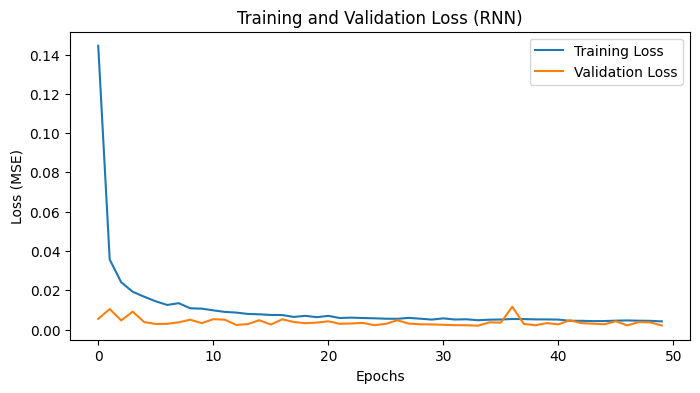

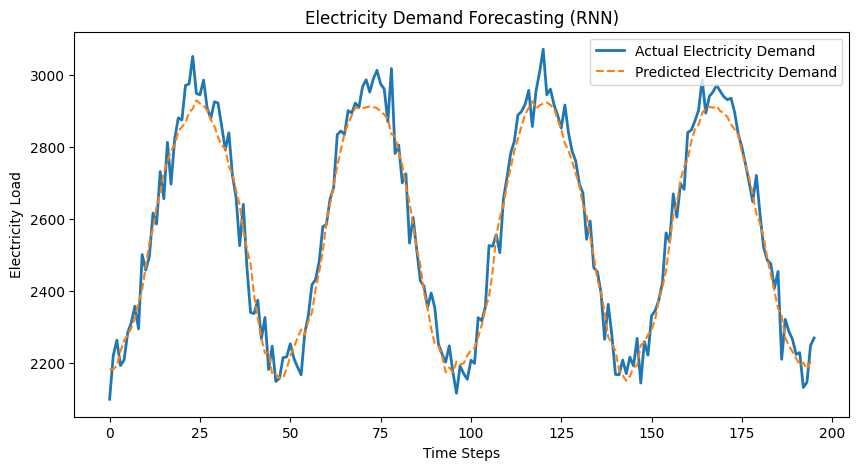

✅ RNN Model Saved Successfully!


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Dropout


# -------------------------------------------------
# 1. Load Dataset
# -------------------------------------------------
data = pd.read_excel("/content/synthetic_PLN_dataset.xlsx")
print("Dataset Loaded Successfully")
print("Columns:", data.columns)

# Target column
target_col = 'BL'

# Convert Date column to datetime index if present
if 'Date' in data.columns or 'Time' in data.columns:
    dt_col = 'Date' if 'Date' in data.columns else 'Time'
    data[dt_col] = pd.to_datetime(data[dt_col])
    data = data.sort_values(dt_col).set_index(dt_col)

# Fill missing values
data = data.fillna(method='ffill').fillna(method='bfill')


# -------------------------------------------------
# 2. Feature Selection
# -------------------------------------------------
features = ['BL']  # add more features if available
dataset = data[features].values


# -------------------------------------------------
# 3. Scaling
# -------------------------------------------------
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(dataset)


# Sequence preparation
def create_sequences(data, seq_len=24):
    X, y = [], []
    for i in range(len(data) - seq_len):
        X.append(data[i:i+seq_len])
        y.append(data[i+seq_len, 0])
    return np.array(X), np.array(y)

SEQ_LEN = 24  # past 24 → predict next hour
X, y = create_sequences(scaled, SEQ_LEN)

print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

# Train/Test split
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]


# -------------------------------------------------
# 4. Build RNN Model
# -------------------------------------------------
model = Sequential([
    SimpleRNN(128, return_sequences=True, input_shape=(SEQ_LEN, X.shape[2])),
    Dropout(0.2),
    SimpleRNN(64, return_sequences=False),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')
model.summary()


# -------------------------------------------------
# 5. Train Model
# -------------------------------------------------
history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    validation_split=0.1,
    verbose=1
)


# -------------------------------------------------
# 6. Evaluate Model
# -------------------------------------------------
y_pred = model.predict(X_test)

# Inverse transform
y_test_inv = scaler.inverse_transform(
    np.concatenate((y_test.reshape(-1,1),
                    np.zeros((len(y_test), scaled.shape[1]-1))), axis=1)
)[:,0]

y_pred_inv = scaler.inverse_transform(
    np.concatenate((y_pred,
                    np.zeros((len(y_pred), scaled.shape[1]-1))), axis=1)
)[:,0]

# Evaluation metrics
mae = mean_absolute_error(y_test_inv, y_pred_inv)
rmse = np.sqrt(mean_squared_error(y_test_inv, y_pred_inv))
r2 = r2_score(y_test_inv, y_pred_inv)

print("\n📊 Model Performance (RNN):")
print(f"MAE: {mae:.3f}")
print(f"RMSE: {rmse:.3f}")
print(f"R² Score: {r2:.3f}")


# -------------------------------------------------
# 7. Plot Training Loss
# -------------------------------------------------
plt.figure(figsize=(8,4))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Training and Validation Loss (RNN)")
plt.xlabel("Epochs")
plt.ylabel("Loss (MSE)")
plt.legend()
plt.show()


# -------------------------------------------------
# 8. Plot Actual vs Predicted
# -------------------------------------------------
plt.figure(figsize=(10,5))
plt.plot(y_test_inv, label='Actual Electricity Demand', linewidth=2)
plt.plot(y_pred_inv, label='Predicted Electricity Demand', linestyle='dashed')
plt.title("Electricity Demand Forecasting (RNN)")
plt.xlabel("Time Steps")
plt.ylabel("Electricity Load")
plt.legend()
plt.show()


# -------------------------------------------------
# 9. Save Model
# -------------------------------------------------
model.save("rnn_electricity_forecast_model.h5")
print("✅ RNN Model Saved Successfully!")
